# GPGN409 homework 
your name: Benjamin Nguyen

Packages

In [1]:
using CairoMakie, Trapz
using Statistics


## **1. Sketch the function f(x)**

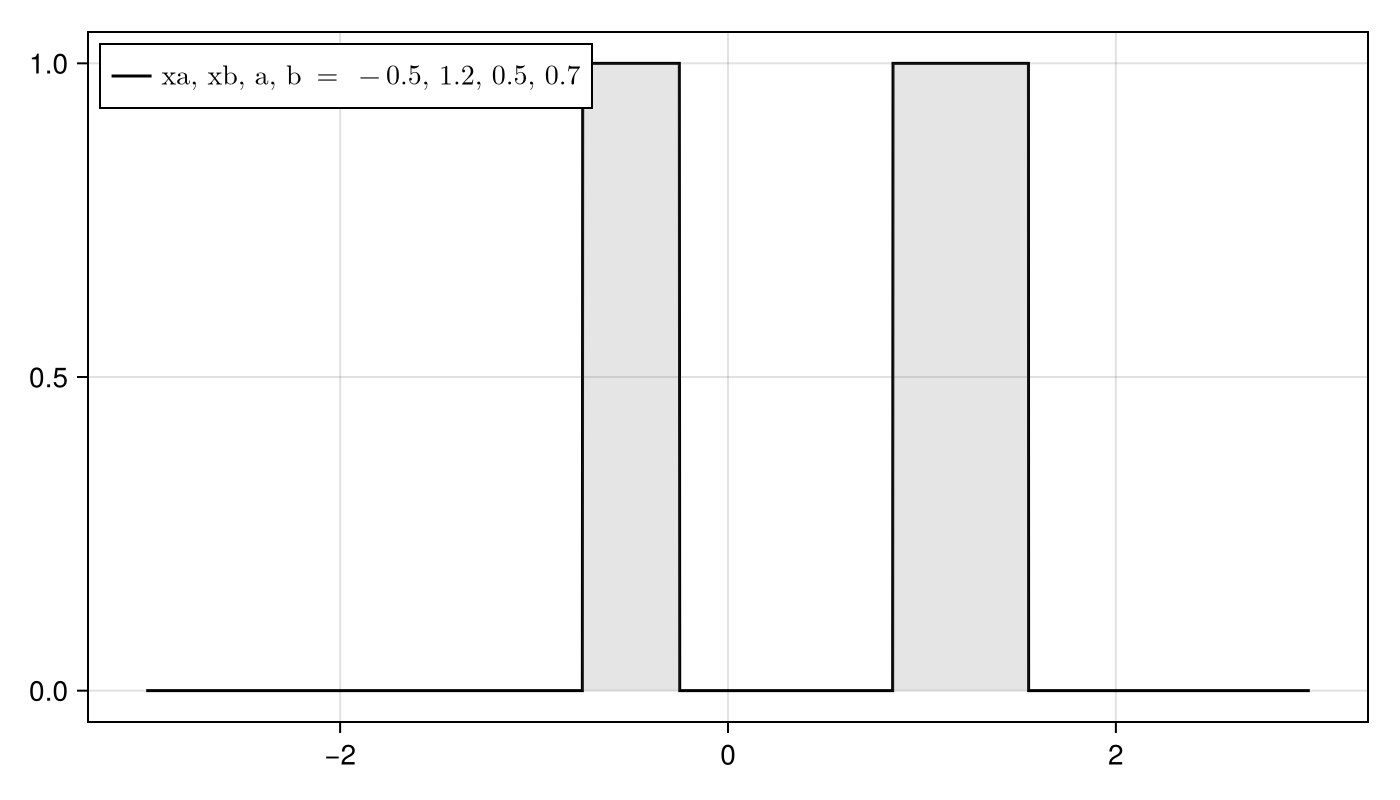

In [2]:


# Boxcar and f(x) functions
boxcar(x) = abs(x) > 1/2 ? 0 : (abs(x) == 1/2 ? 1/2 : 1)
f(x, xa, xb, a, b) = boxcar((x - xa) / a) + boxcar((x - xb) / b)



# Parameters
xa, xb, a, b = -0.5, 1.2, 0.5, 0.7

# Define the range of x
x = -3:0.001:3
y = f.(x, xa, xb, a, b)  # Compute f(x) for each x

# Plotting
fig = Figure(size=(700, 400))
ax = Axis(fig[1, 1])
lines!(ax, x, y, label=L"\text{xa, xb, a, b = -0.5, 1.2, 0.5, 0.7}", color=:black)
band!(ax, x, 0*x, y, color=(:grey, 0.2), transparency=true)

axislegend(ax, position=:lt)

fig

## **2. Is f (x) a probability density function? If yes, justify your answer. If not, scale it to become a PDF.**

To check if f(x) is a PDF or not, we need to check if f(x) >= 0 with all x, and integral of f(x) from -inf to inf = 1.

Function:
$$
f(x) = \Pi\left(\frac{x - x_a}{a}\right) + \Pi\left(\frac{x - x_b}{b}\right)
$$
where $\Pi(x)$ is the boxcar function defined by
$$
\Pi(x) = \begin{cases} 
0 & |x| > \frac{1}{2} \\
\frac{1}{2} & |x| = \frac{1}{2} \\
1 & |x| < \frac{1}{2}
\end{cases},
$$
and $x_a$, $x_b$, $a$, and $b$ are known positive real numbers.

Therefore $f(x) >=0 $ with all $x$.

Integral of $\Pi(x)$ = $a + b$. $f(x)$ is not a PDF.

Scale $f(x)$
$$
f(x) =  \frac{1}{a+b}f(x)
$$

Because the integral of f(x) is not equal 1. Therefore, f(x) is not the PDF. We need to scale f(x) by integral of f(x)

## **3. If xa != xb, ﬁnd the mean of the probability density function. What condition must a and b satisfy such that the mean of the probability density function is halfway between xa and xb? Justify your answer.**




The mean $\mu$ of a probability density function $f(x)$ is given by:
$$
\mu = \int_{-\infty}^{\infty} x f(x) \, dx.
$$
Since $f(x)$ is a combination of two boxcar functions centered at $x_a$ and $x_b$, the mean can be thought of as a weighted average of $x_a$ and $x_b$, with weights proportional to $a$ and $b$:
$$
\mu = \frac{a x_a + b x_b}{a + b}.
$$
For the mean to be exactly halfway between $x_a$ and $x_b$, we need:
$$
\mu = \frac{x_a + x_b}{2}.
$$
Setting the two expressions for $\mu$ equal gives:
$$
\frac{a x_a + b x_b}{a + b} = \frac{x_a + x_b}{2}.
$$
Solving for $a$ and $b$, we get the condition:
$$
a = b.
$$

## **4. If xa = xb and a 6 = b, what is the standard deviation of the probability density function?**

Define the PDF

Since $f(x)$ is not normalized, we scale it by $\frac{1}{a + b}$ to make it a probability density function:
$$
f_{\text{PDF}}(x) = \frac{1}{a + b} \left( \Pi\left(\frac{x - x_0}{a}\right) + \Pi\left(\frac{x - x_0}{b}\right) \right).
$$

Since $f_{\text{PDF}}(x)$ is symmetric around $x_0$, the mean $\mu$ is simply:
$$
\mu = x_0.
$$

The standard deviation $\sigma$ is given by:
$$
\sigma = \sqrt{\int_{-\infty}^{\infty} (x - x_0)^2 f_{\text{PDF}}(x) \, dx}.
$$

Since $f_{\text{PDF}}(x)$ only has nonzero values in the intervals $\left[x_0 - \frac{a}{2}, x_0 + \frac{a}{2}\right]$ and $\left[x_0 - \frac{b}{2}, x_0 + \frac{b}{2}\right]$, we can split the integral into two parts:
$$
\sigma = \sqrt{\int_{x_0 - \frac{a}{2}}^{x_0 + \frac{a}{2}} (x - x_0)^2 \frac{1}{a + b} \, dx + \int_{x_0 - \frac{b}{2}}^{x_0 + \frac{b}{2}} (x - x_0)^2 \frac{1}{a + b} \, dx}.
$$

For each interval, $(x - x_0)^2$ is simply the square of the distance from $x_0$. Let’s compute these integrals separately.

1. **For the interval** $\left[x_0 - \frac{a}{2}, x_0 + \frac{a}{2}\right]$:
   $$
   \int_{x_0 - \frac{a}{2}}^{x_0 + \frac{a}{2}} (x - x_0)^2 \frac{1}{a + b} \, dx = \frac{1}{a + b} \int_{-a/2}^{a/2} x^2 \, dx = \frac{1}{a + b} \cdot \frac{a^3}{12} = \frac{a^3}{12(a + b)}.
   $$

2. **For the interval** $\left[x_0 - \frac{b}{2}, x_0 + \frac{b}{2}\right]$:
   $$
   \int_{x_0 - \frac{b}{2}}^{x_0 + \frac{b}{2}} (x - x_0)^2 \frac{1}{a + b} \, dx = \frac{1}{a + b} \int_{-b/2}^{b/2} x^2 \, dx = \frac{1}{a + b} \cdot \frac{b^3}{12} = \frac{b^3}{12(a + b)}.
   $$

Now, we can add these two results to find $\sigma^2$:
$$
\sigma^2 = \frac{a^3}{12(a + b)} + \frac{b^3}{12(a + b)} = \frac{a^3 + b^3}{12(a + b)}.
$$
Thus, the standard deviation $\sigma$ is:
$$
\sigma = \sqrt{\frac{a^3 + b^3}{12(a + b)}}.
$$

This is the standard deviation of the probability density function for the given conditions.


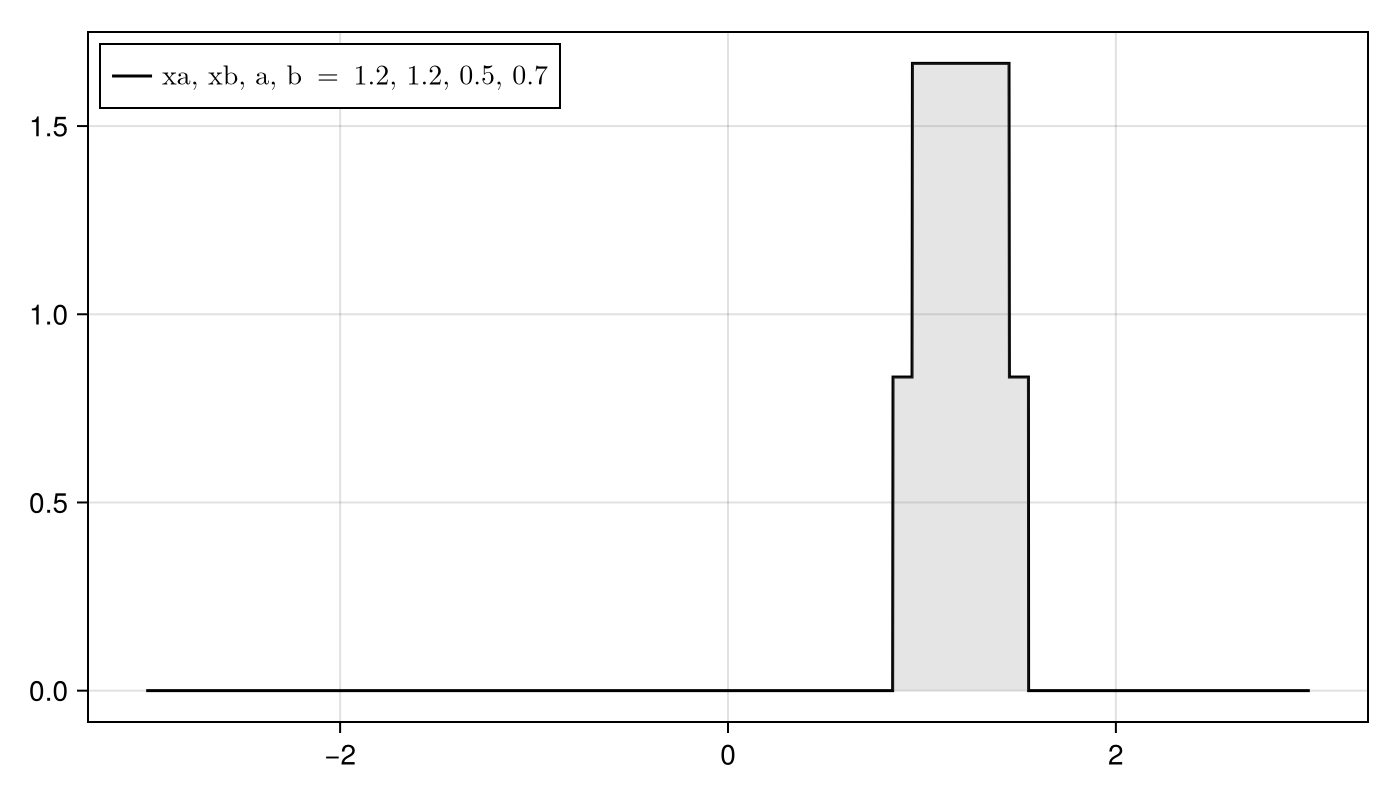

In [3]:


# Boxcar and f(x) functions
boxcar(x) = abs(x) > 1/2 ? 0 : (abs(x) == 1/2 ? 1/2 : 1)
f(x, xa, xb, a, b) = boxcar((x - xa) / a) + boxcar((x - xb) / b)


xa, xb, a, b = 1.2, 1.2, 0.5, 0.7

# Define the range of x
x = -3:0.001:3
y = f.(x, xa, xb, a, b)  # Compute f(x) for each x
y = 1/(a+b)*y
# Plotting
fig = Figure(size=(700, 400))
ax = Axis(fig[1, 1])
lines!(ax, x, y, label=L"\text{xa, xb, a, b = 1.2, 1.2, 0.5, 0.7}", color=:black)
band!(ax, x, 0*x, y, color=(:grey, 0.2), transparency=true)

axislegend(ax, position=:lt)

fig

In [4]:
# Numerical solution
yy = y.*(x)
mu = trapz(x, yy)
yyy = y.*(x .- mu).^2
println("Integral of g(x)_PDF over the range: ", √(trapz(x, yyy)))

Integral of g(x)_PDF over the range: 0.18013704105165854


In [5]:
# Analytical solution
@show σ = (√((a^3+b^3)/(12(a+b))));

σ = √((a ^ 3 + b ^ 3) / (12 * (a + b))) = 0.18027756377319945


# **Extra credit**

## **1. Sketch the function f(x)**

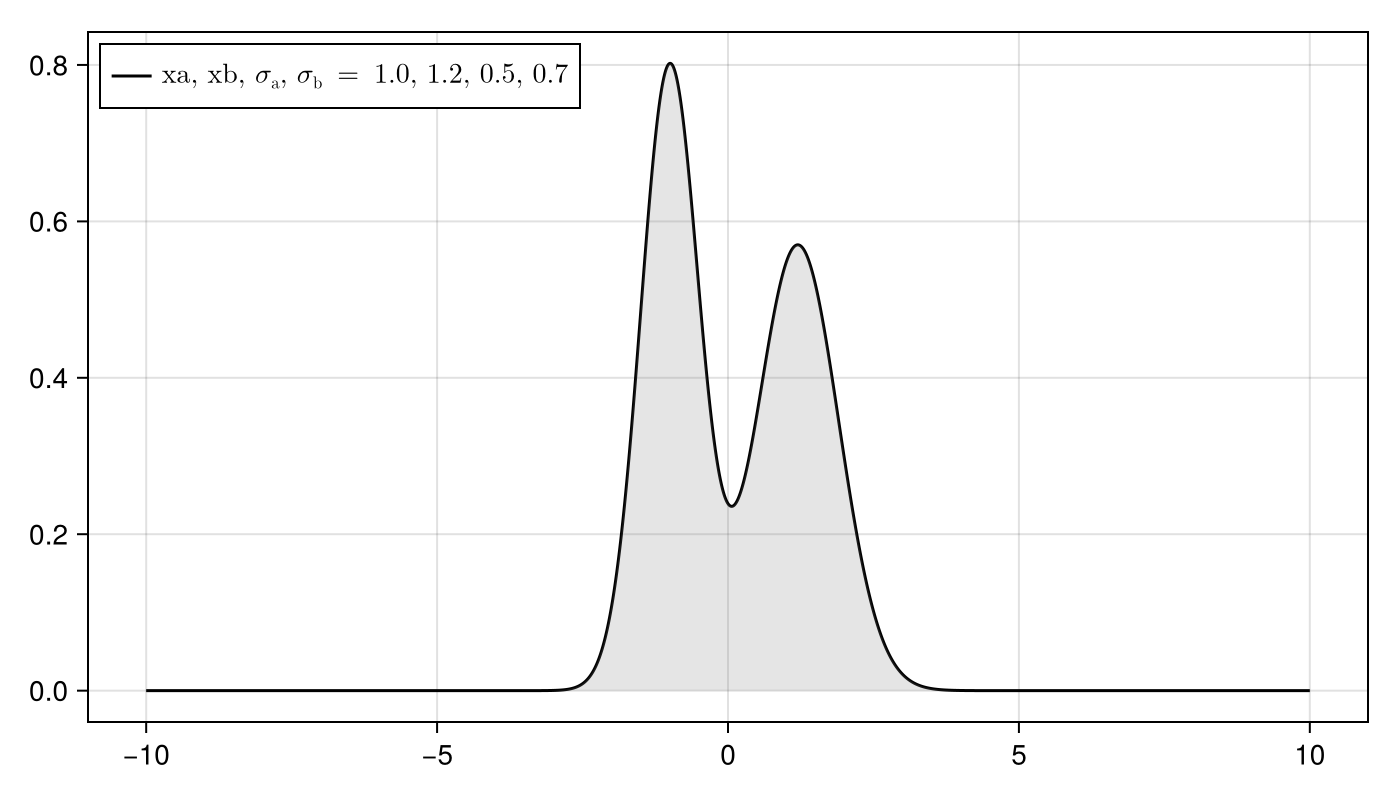

In [6]:
# Create function
function g(x::Float64, x_a::Float64, σ_a::Float64, x_b::Float64, σ_b::Float64)
    term1 = (1 / (sqrt(2 * π) * σ_a)) * exp(-0.5 * ((x - x_a) / σ_a)^2)
    term2 = (1 / (sqrt(2 * π) * σ_b)) * exp(-0.5 * ((x - x_b) / σ_b)^2)
    return term1 + term2
end
xa, xb, a, b = -1.0, 1.2, 0.5, 0.7
x = -10:0.001:10
y = g.(x, xa, a, xb, b)

# Plotting
fig = Figure(size=(700, 400))
ax = Axis(fig[1, 1])
lines!(ax, x, y, label=L"\text{xa, xb, \sigma_a, \sigma_b = 1.0, 1.2, 0.5, 0.7}", color=:black)
band!(ax, x, 0*x, y, color=(:grey, 0.2), transparency=true)
axislegend(ax, position=:lt)
fig

## **2. Is f (x) a probability density function? If yes, justify your answer. If not, scale it to become a PDF.**

In [7]:
# Compute integral of g:

integral_f = trapz(x, y)
# Display the integral result
println("Integral of f(x) over the range: ", integral_f)

Integral of f(x) over the range: 1.9999999999999922


For $g(x)$ to be a probability density function (PDF), the integral over all $x$ must be equal to 1:

$$
\int_{-\infty}^{\infty} g(x) \, dx = 1.
$$

Since $g(x)$ is a sum of two Gaussian functions, each Gaussian contributes an area of 1 if they are normalized. Therefore:

$$
\int_{-\infty}^{\infty} g(x) \, dx = 1 + 1 = 2.
$$

Since this integral is 2, not 1, $g(x)$ is not a PDF. To make it a PDF, we scale $g(x)$ by a factor of $\frac{1}{2}$:

$$
g_{PDF}(x) = \frac{1}{2} g(x).
$$


### Update g 

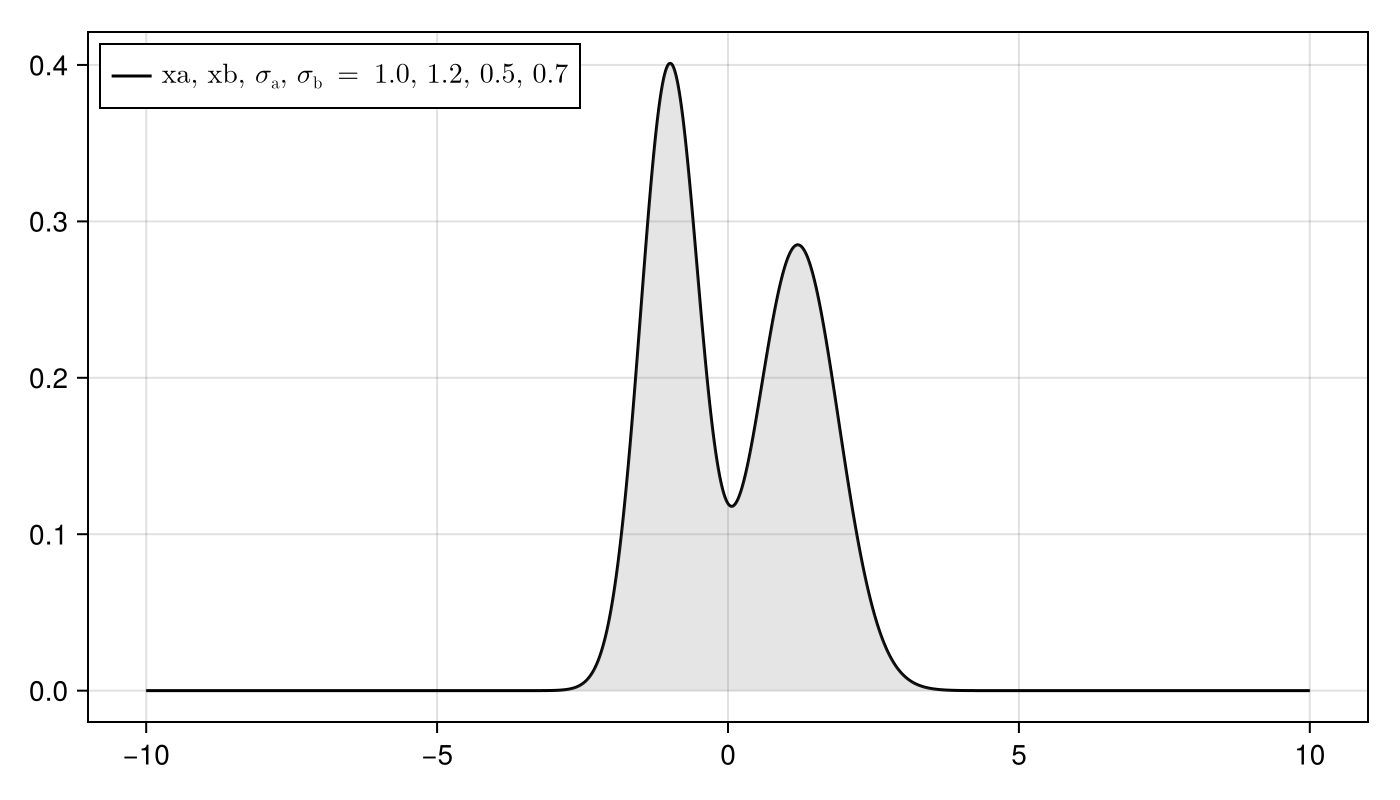

In [8]:
# Create function
function g(x::Float64, x_a::Float64, σ_a::Float64, x_b::Float64, σ_b::Float64)
    term1 = (1 / (sqrt(2 * π) * σ_a)) * exp(-0.5 * ((x - x_a) / σ_a)^2)
    term2 = (1 / (sqrt(2 * π) * σ_b)) * exp(-0.5 * ((x - x_b) / σ_b)^2)
    return term1 + term2
end
xa, xb, a, b = -1.0, 1.2, 0.5, 0.7
x = -10:0.001:10
y = g.(x, xa, a, xb, b)
y = y./2
# Plotting
fig = Figure(size=(700, 400))
ax = Axis(fig[1, 1])
lines!(ax, x, y, label=L"\text{xa, xb, \sigma_a, \sigma_b = 1.0, 1.2, 0.5, 0.7}", color=:black)
band!(ax, x, 0*x, y, color=(:grey, 0.2), transparency=true)
axislegend(ax, position=:lt)
fig

## **3. Compute the mean of g (x)**

$$
g(x) = \frac{1}{\sqrt{2\pi} \sigma_a} e^{-\frac{1}{2} \left( \frac{x - x_a}{\sigma_a} \right)^2} + \frac{1}{\sqrt{2\pi} \sigma_b} e^{-\frac{1}{2} \left( \frac{x - x_b}{\sigma_b} \right)^2}
$$

$$
g_{\text{PDF}}(x) = \frac{1}{2} g(x).
$$

$$
\mu = \int_{-\infty}^{\infty} x \cdot g_{\text{PDF}}(x) \, dx = \frac{1}{2} \int_{-\infty}^{\infty} x \cdot g(x) \, dx.
$$
$$
\mu = \frac{1}{2} \left( \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi} \sigma_a} e^{-\frac{1}{2} \left( \frac{x - x_a}{\sigma_a} \right)^2} \, dx + \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi} \sigma_b} e^{-\frac{1}{2} \left( \frac{x - x_b}{\sigma_b} \right)^2} \, dx \right).
$$

$$
\int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi} \sigma_a} e^{-\frac{1}{2} \left( \frac{x - x_a}{\sigma_a} \right)^2} \, dx = x_a
$$
and
$$
\int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi} \sigma_b} e^{-\frac{1}{2} \left( \frac{x - x_b}{\sigma_b} \right)^2} \, dx = x_b.
$$

Therefore,
$$
\mu = \frac{1}{2} (x_a + x_b).
$$




## Using the numerical methods to compare

In [9]:
# Numerical solution
yy = y.*x
println("Integral of g(x)_PDF over the range: ", trapz(x, y))
println("mu: ", trapz(x, yy))

Integral of g(x)_PDF over the range: 0.9999999999999961
mu: 0.10000000000000031


In [10]:
# Analytical solution
@show μ=(xa + xb)/2 

μ = (xa + xb) / 2 = 0.09999999999999998


0.09999999999999998

## **Compute the standard deviation of g (x)**

the mean $ \mu $ is simply:
$$
\mu = 0.
$$

### Step 3: Compute the Standard Deviation
The standard deviation \( \sigma \) is given by:
$$
\sigma = \sqrt{\int_{-\infty}^{\infty} x^2 \cdot g_{\text{PDF}}(x) \, dx}.
$$


### Step 4: Evaluate Each Integral
Each Gaussian term contributes to the variance. For a Gaussian $ e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $, the variance is $ \sigma^2 + \mu^2 $.

1. For the Gaussian centered at $ x = x_0 $, the variance contribution is:
   $$
   \sigma_0^2 + x_0^2.
   $$

2. For the Gaussian centered at $ x = -x_0 $, the variance contribution is also:
   $$
   \sigma_0^2 + x_0^2.
   $$

Thus, we have:
$$
\sigma^2 = \frac{1}{2} \left( \sigma_0^2 + x_0^2 + \sigma_0^2 + x_0^2 \right) = \sigma_0^2 + x_0^2.
$$


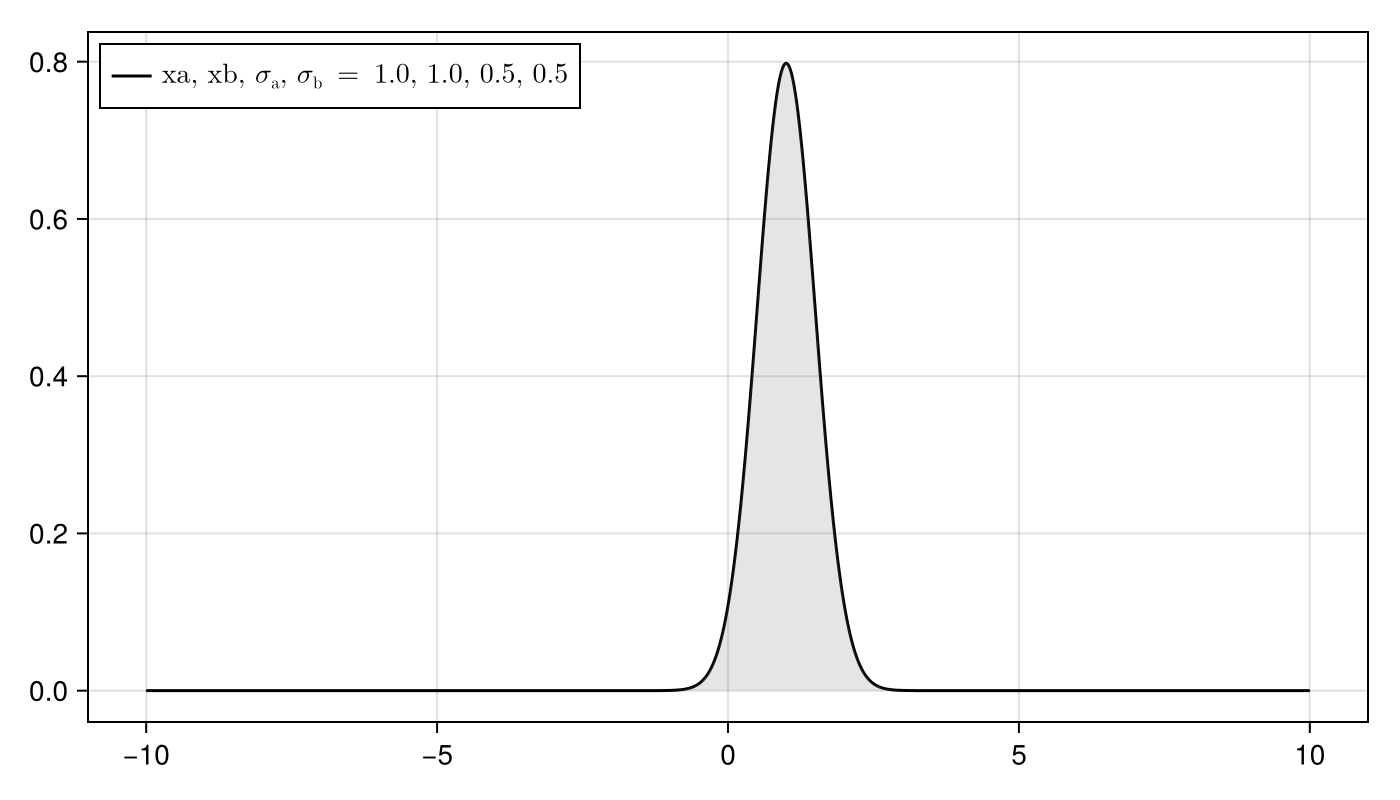

In [11]:
# Create function
function g(x::Float64, x_a::Float64, σ_a::Float64, x_b::Float64, σ_b::Float64)
    term1 = (1 / (sqrt(2 * π) * σ_a)) * exp(-0.5 * ((x - x_a) / σ_a)^2)
    term2 = (1 / (sqrt(2 * π) * σ_b)) * exp(-0.5 * ((x - x_b) / σ_b)^2)
    return term1 + term2
end
xa, xb, a, b = 1.0, 1.0, 0.5, 0.5
x = -10:0.001:10
y = g.(x, xa, a, xb, b)
y = y/2;
# Plotting
fig = Figure(size=(700, 400))
ax = Axis(fig[1, 1])
lines!(ax, x, y, label=L"\text{xa, xb, \sigma_a, \sigma_b = 1.0, 1.0, 0.5, 0.5}", color=:black)
band!(ax, x, 0*x, y, color=(:grey, 0.2), transparency=true)
axislegend(ax, position=:lt)

fig

In [12]:
# Numerical solution
yyy = y.*(x).^2
println("sigma = ", √(trapz(x, yyy)))

sigma = 1.1180339887498953


In [13]:
# Using analytical method:
@show σ= √(0.5^2 + 1);

σ = √(0.5 ^ 2 + 1) = 1.118033988749895
